# View Examples of Phone Segmentation Results Without Reference

Copyright (c) 2021 Herman Kamper, MIT License

## Preliminaries

In [83]:
%matplotlib inline
from pathlib import Path
from scipy.spatial import distance
from tqdm import tqdm
import librosa
import numpy as np
import pylab as plt
import sys

sys.path.append("..")

from eval_segmentation import boundaries_to_intervals, intervals_to_boundaries, score_boundaries, get_os, get_rvalue, get_intervals_from_dir

## Read spectrograms, codes, segmentation

In [84]:
# Dataset
dataset = "zs2017_fr"
split = "train"
model = "xlsr"
# model = "cpc_big"
phoneseg_tag = "phoneseg_dp_penalized_tune"
prequant_filetype = ".npy"
# prequant_filetype = ".txt"

# # Utterances
utterances = [
    "M09_O_020472-020561",
#     "M09_O_020304-020470",
#     "F03_R_567965-568427"
    ]
# utterances = [
#     "s22_02b_027666-027761",
#     "s17_01a_001056-001166",
#     "s17_01a_005537-005624",
# #     "s17_01a_008913-009046",
# #     "s17_01a_001935-002053",
#     ]

# Directories
# indices_dir = Path("../exp/")/model/dataset/split/"indices"
z_dir = Path("../exp/")/model/dataset/split/"prequant"
phoneseg_dir = Path("../exp/")/model/dataset/split/phoneseg_tag/"intervals"
# phoneref_dir = Path("../data/")/dataset/"phone_intervals"
audio_dir = Path("../../zerospeech2021_baseline/wav/")/dataset/split

In [85]:
# Read pre-quantisation
z_dict = {}
for utterance_key in sorted(utterances):
    if prequant_filetype == ".txt":
        z_fn = (z_dir/utterance_key).with_suffix(".txt")
        z_dict[utterance_key] = np.loadtxt(z_fn)
    elif prequant_filetype == ".npy":
        z_fn = (z_dir/utterance_key).with_suffix(".npy")
        z_dict[utterance_key] = np.load(z_fn)

# Audio
audio_dict = {}
for utterance_key in sorted(utterances):
    wav_fn = (audio_dir/utterance_key).with_suffix(".wav")
    signal, sample_rate = librosa.core.load(wav_fn, sr=None)
    fbank = np.log(librosa.feature.melspectrogram(
        signal, sr=sample_rate, n_mels=40,
        n_fft=int(np.floor(0.025*sample_rate)),
        hop_length=int(np.floor(0.01*sample_rate)), fmin=0, fmax=16000,
        ))
    audio_dict[utterance_key] = fbank

# Read segmentation
segmentation_interval_dict = {}
for utterance_key in sorted(utterances):
    segmentation_interval_dict[utterance_key] = []
    fn = (phoneseg_dir/utterance_key).with_suffix(".txt")
    for start, end, label in [i.split() for i in fn.read_text().strip().split("\n")]:
        start = int(start)
        end = int(end)
        label = int(label)
        segmentation_interval_dict[utterance_key].append((start, end, label))

<ipython-input-85-3540f1181415>:16: RuntimeWarning: divide by zero encountered in log
  fbank = np.log(librosa.feature.melspectrogram(


## Convert intervals to boundaries

In [86]:
segmentation_boundaries_dict = {}
for utterance_key in segmentation_interval_dict:
    segmentation_boundaries_dict[utterance_key] = intervals_to_boundaries(
        segmentation_interval_dict[utterance_key]
        )

## Plot codes and segmentation on top of spectrograms

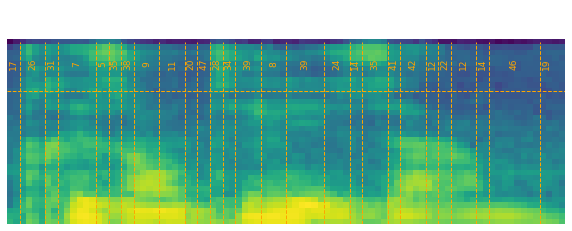

In [87]:
# for utterance_key in utterances[:1]:
for utterance_key in utterances:
    features = audio_dict[utterance_key]
#     indices = indices_dict[utterance_key]
#     phones = reference_interval_dict[utterance_key]

    # Features
    plt.figure(figsize=(10, 4))
    plt.imshow(features, origin="bottom", aspect="auto", interpolation="nearest")

#     # Codes
#     for i in range(len(indices)):
#         plt.text(i*2 + 0.5, features.shape[0] - 3, str(indices[i]), color="w", va="center", ha="center", rotation=90, size=9)
#     plt.hlines(features.shape[0] - 7, -0.5, features.shape[1] - 0.5, colors="w", lw=1)
    
    # Segmentation
    c = "orange"
    for start, end, label in segmentation_interval_dict[utterance_key]:
        mid_frame = start + (end - start)/2.0
        plt.text(mid_frame - 0.5, features.shape[0] - 11, label, color=c, va="center", ha="center", rotation=90, size=9)
    plt.vlines(
        np.where(segmentation_boundaries_dict[utterance_key][:-1])[0] + 0.5, ymin=-0.5, ymax=features.shape[0] - 7, colors=c, lw=1, linestyles="dashed"
        )  # predicted boundaries
    plt.hlines(features.shape[0] - 16, -0.5, features.shape[1] - 0.5, colors=c, lw=1, linestyles="dashed")
    
    plt.axis("off")
#     # Reference
#     for start, end, label in phones:
#         mid_frame = start + (end - start)/2.0
#         plt.text(mid_frame - 0.5, 3, label, color="w", va="center", ha="center")
#     plt.vlines(
#         np.where(reference_boundaries_dict[utterance_key])[0] + 0.5, ymin=-0.5, ymax=73, colors="w", lw=1
#         )  # reference boundaries

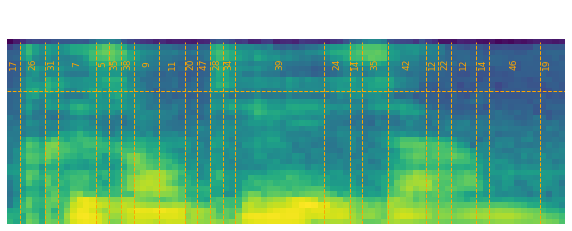

In [66]:
# for utterance_key in utterances[:1]:
for utterance_key in utterances:
    features = audio_dict[utterance_key]
#     indices = indices_dict[utterance_key]
#     phones = reference_interval_dict[utterance_key]

    # Features
    plt.figure(figsize=(10, 4))
    plt.imshow(features, origin="bottom", aspect="auto", interpolation="nearest")

#     # Codes
#     for i in range(len(indices)):
#         plt.text(i*2 + 0.5, features.shape[0] - 3, str(indices[i]), color="w", va="center", ha="center", rotation=90, size=9)
#     plt.hlines(features.shape[0] - 7, -0.5, features.shape[1] - 0.5, colors="w", lw=1)
    
    # Segmentation
    c = "orange"
    for start, end, label in segmentation_interval_dict[utterance_key]:
        mid_frame = start + (end - start)/2.0
        plt.text(mid_frame - 0.5, features.shape[0] - 11, label, color=c, va="center", ha="center", rotation=90, size=9)
    plt.vlines(
        np.where(segmentation_boundaries_dict[utterance_key][:-1])[0] + 0.5, ymin=-0.5, ymax=features.shape[0] - 7, colors=c, lw=1, linestyles="dashed"
        )  # predicted boundaries
    plt.hlines(features.shape[0] - 16, -0.5, features.shape[1] - 0.5, colors=c, lw=1, linestyles="dashed")
    
    plt.axis("off")
#     # Reference
#     for start, end, label in phones:
#         mid_frame = start + (end - start)/2.0
#         plt.text(mid_frame - 0.5, 3, label, color="w", va="center", ha="center")
#     plt.vlines(
#         np.where(reference_boundaries_dict[utterance_key])[0] + 0.5, ymin=-0.5, ymax=73, colors="w", lw=1
#         )  # reference boundaries